In [127]:
# install.packages("readxl")
# install.packages("dplyr")
# install.packages("ggplot2")
# install.packages("DescTools")

# library(readxl)
# library(dplyr)
# library(ggplot2)
# library(DescTools)

# Lendo planilha com os dados de café e soja
df_cafe <- read_excel("cultivo_cafe_soja.xlsx", sheet = "Café")
df_soja <- read_excel("cultivo_cafe_soja.xlsx", sheet = "Soja")

# Exibe as 5 primeiras linhas
head(df_cafe)
head(df_soja)

Cultura,Num_pes,Producao,Umid_grao,Qtd_chuva,Variedade,Tipo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Cafe,5126,38.55,13.16,920,Arabica,Gourmet
Cafe,5459,31.47,12.42,915,Arabica,Tradicional
Cafe,4860,49.50,13.71,1032,Robusta,Tradicional
Cafe,5294,34.00,12.60,1058,Arabica,Gourmet
Cafe,5130,45.80,13.66,1158,Arabica,Gourmet
Cafe,5095,40.41,13.40,997,Arabica,Tradicional


Cultura,Num_plantas,Producao,Qtd_fertilizante,Indice_pluviometrico,Variedade,Fertilidade_solo
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Soja,247,55.08,251,946,Convencional,Alta
Soja,275,66.70,343,993,Convencional,Baixa
Soja,258,78.08,212,1352,Transgenica,Alta
Soja,285,70.88,313,1103,Transgenica,Media
Soja,221,67.10,323,1117,Transgenica,Alta
Soja,229,52.92,305,1373,Transgenica,Alta


In [128]:
# Análise descritiva da produção de café da variável "Produção" (variável quantitativa)

estatisticas_cafe <- df_cafe %>%
  summarise(
    media = mean(Producao, na.rm = TRUE),
    mediana = median(Producao, na.rm = TRUE),
    moda = Mode(Producao, na.rm = TRUE),
    maximo = max(Producao, na.rm = TRUE),
    minimo = min(Producao, na.rm = TRUE),
    amplitude = diff(range(Producao, na.rm = TRUE)),
    variancia = var(Producao, na.rm = TRUE),
    desvio_padrao = sd(Producao, na.rm = TRUE),
    coeficiente_variacao = (sd(Producao) / mean(Producao)) * 100,
    quartis = list(quantile(Producao, probs = c(0.25, 0.50, 0.75), na.rm = TRUE)),
    decis = list(quantile(Producao, probs=seq(0.1, 0.9, by = 0.1), na.rm = TRUE)),
    centis = list(quantile(Producao, probs=seq(0.01, 0.09, by = 0.01), na.rm = TRUE))
  )

print(estatisticas_cafe)

# A tibble: 1 × 12
  media mediana  moda maximo minimo amplitude variancia desvio_padrao
  <dbl>   <dbl> <dbl>  <dbl>  <dbl>     <dbl>     <dbl>         <dbl>
1  34.7    33.8  31.8   49.5   20.4      29.1      71.7          8.46
# ℹ 4 more variables: coeficiente_variacao <dbl>, quartis <list>, decis <list>,
#   centis <list>


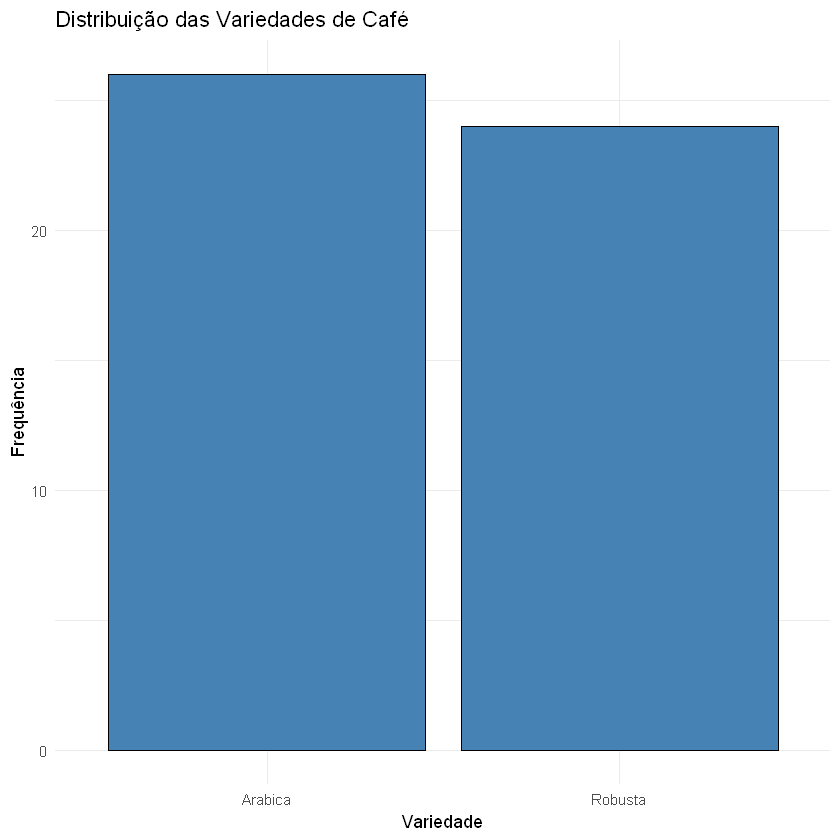

In [129]:
# Análise gráfica utilizando o campo "Variedade" da tabela de "Café" (variável qualitativa)

ggplot(df_cafe, aes(x = Variedade)) +
  geom_bar(fill = "steelblue", color = "black") +
  labs(title = "Distribuição das Variedades de Café", x = "Variedade", y = "Frequência") +
  theme_minimal()

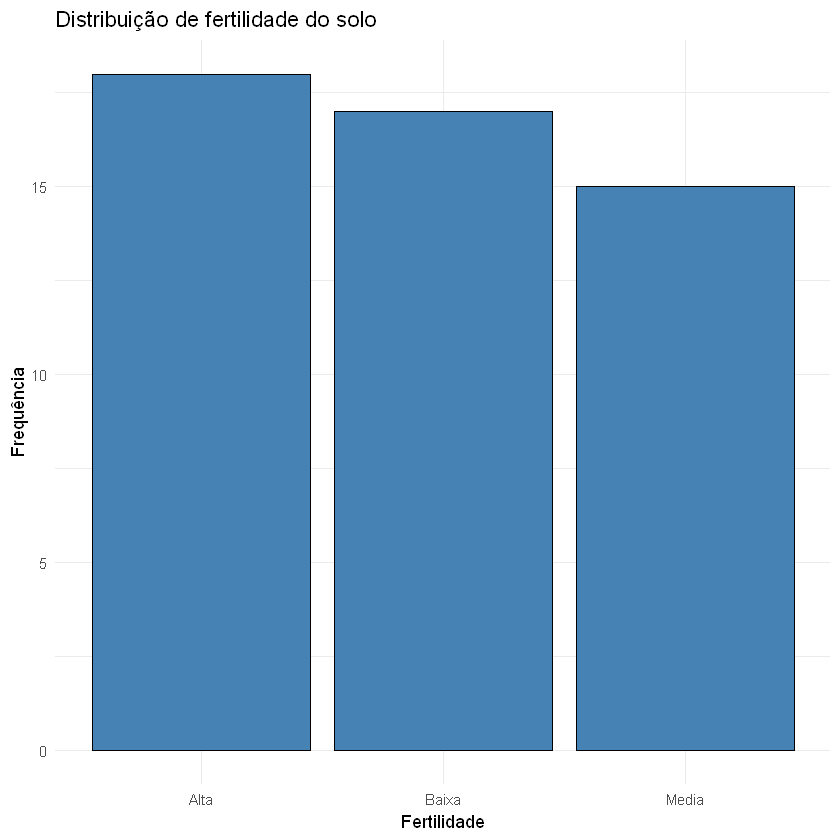

In [130]:
# Análise gráfica utilizando o campo "Fertilidade_Solo" da tabela de "Soja" (variável qualitativa)

ggplot(df_soja, aes(x = Fertilidade_solo)) +
  geom_bar(fill = "steelblue", color = "black") +
  labs(title = "Distribuição de fertilidade do solo", x = "Fertilidade", y = "Frequência") +
  theme_minimal()